Data Understanding

In [36]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing, compose, model_selection, ensemble, linear_model, neighbors, metrics

In [37]:
df = pd.read_excel("loan_data_2007_2014.xlsx")
print(df.head(5))

   Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         Na

Data Understanding

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

In [39]:
mv = df.isnull().sum()
mv_sorted = mv.sort_values()
mv_sorted

Unnamed: 0                        0
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
                              ...  
verification_status_joint    466285
dti_joint                    466285
total_cu_tl                  466285
mths_since_rcnt_il           466285
inq_last_12m                 466285
Length: 75, dtype: int64

In [40]:
df.isnull().sum().sum()

9932861

In [41]:
#duplicate rows check
duplicate_rows = df[df.duplicated()]
number_of_duplicates = duplicate_rows.shape[0]
print(number_of_duplicates)

0


In [54]:
df_1 = df.drop(columns=['Unnamed: 0', 'id', 'member_id', 'funded_amnt_inv', 'installment', 'issue_d', 'url', 'title', 'zip_code', 'policy_code', 'addr_state', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'application_type', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'next_pymnt_d', 'pymnt_plan', 'total_rev_hi_lim', 'sub_grade', 'emp_title'])

In [55]:
#missing values
missing_values = (df_1.isnull().sum()/len(df_1)*100).round(2).sort_values(ascending=False)
missing_values_df = pd.DataFrame(missing_values, columns=['Missing Values Percentage'])
missing_values_df

,Missing Values Percentage
inq_last_12m,100.00
il_util,100.00
open_acc_6m,100.00
verification_status_joint,100.00
dti_joint,100.00
annual_inc_joint,100.00
open_il_24m,100.00
open_il_12m,100.00
total_bal_il,100.00
mths_since_rcnt_il,100.00


In [56]:
df_2 = df_1.drop(columns=['inq_last_12m', 'total_bal_il','verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'annual_inc_joint', 'mths_since_rcnt_il', 'open_il_24m', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'dti_joint'])

Define Good - Bad

In [57]:
df_2.loan_status.value_counts(normalize=True)*100

loan_status
Current                                                48.087305
Fully Paid                                             39.619327
Charged Off                                             9.109297
Late (31-120 days)                                      1.479966
In Grace Period                                         0.674779
Does not meet the credit policy. Status:Fully Paid      0.426402
Late (16-30 days)                                       0.261246
Default                                                 0.178454
Does not meet the credit policy. Status:Charged Off     0.163225
Name: proportion, dtype: float64

In [58]:
def categorize_loan(row):
    if row['loan_status'] in ['Fully Paid', 'Current', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']:
        return 0  # Good loan
    else:
        return 1  # Bad loan

# Apply the function to create the loan_category feature
df_2['loan_category'] = df_2.apply(categorize_loan, axis=1)

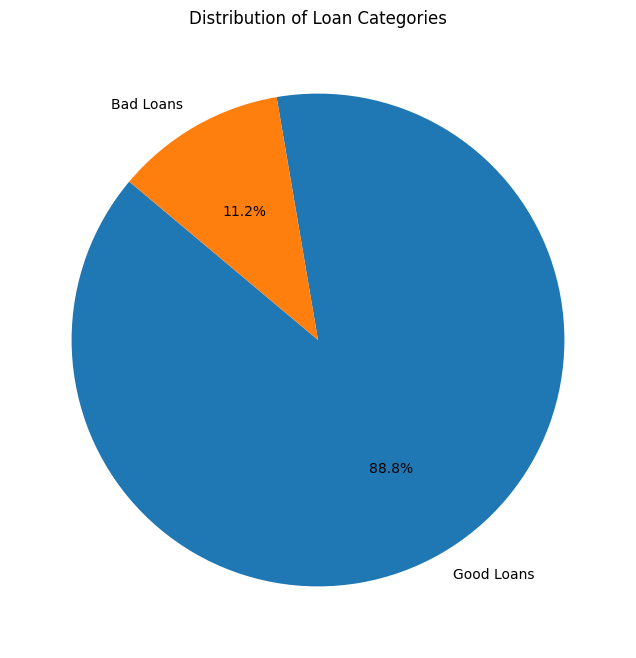

In [59]:
# Count the number of loans in each category
category_counts = df_2['loan_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=['Good Loans', 'Bad Loans'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Categories')
plt.show()

Exploratory Data Analysis

In [60]:
# split numerical and categorical
categorical_col = []
numerical_col = []

for i in df_2.columns:
  if new_df[i].dtype == 'object':
    categorical_col.append(i)
  else:
    numerical_col.append(i)

print('Categorical Columns')
print(categorical_col)
print(len(categorical_col))
print('Numerical Columns')
print(numerical_col)
print(len(numerical_col))

Categorical Columns
['grade', 'home_ownership', 'verification_status', 'loan_status', 'desc', 'purpose', 'initial_list_status']
7
Numerical Columns
['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc', 'acc_now_delinq', 'loan_category']
14


In [61]:
df_2[categorical_col].describe().transpose()

,count,unique,top,freq
grade,466285,7,B,136929
home_ownership,466227,6,MORTGAGE,235848
verification_status,466227,3,Verified,168033
loan_status,466227,9,Current,224196
desc,125962,124416,,234
purpose,461467,14,debt_consolidation,271648
initial_list_status,461432,2,f,298556


In [62]:
df_2[numerical_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.00,12000.00,20000.00,35000.00
funded_amnt,466285.0,14291.801044,8274.371300,500.00,8000.00,12000.00,20000.00,35000.00
int_rate,466285.0,13.829236,4.357587,5.42,10.99,13.66,16.49,26.06
annual_inc,466223.0,73276.028327,54964.372002,1896.00,45000.00,63000.00,88943.50,7500000.00
dti,461432.0,17.237802,7.853240,0.00,11.38,16.89,22.80,39.99
delinq_2yrs,461403.0,0.285683,0.798802,0.00,0.00,0.00,0.00,29.00
mths_since_last_record,62242.0,74.249462,30.343930,0.00,53.00,76.00,102.00,129.00
open_acc,461403.0,11.195161,4.991352,0.00,8.00,10.00,14.00,84.00
pub_rec,461403.0,0.161343,0.512223,0.00,0.00,0.00,0.00,63.00
total_acc,461403.0,25.076671,11.605473,1.00,17.00,23.00,32.00,156.00


In [ ]:
# Univariate

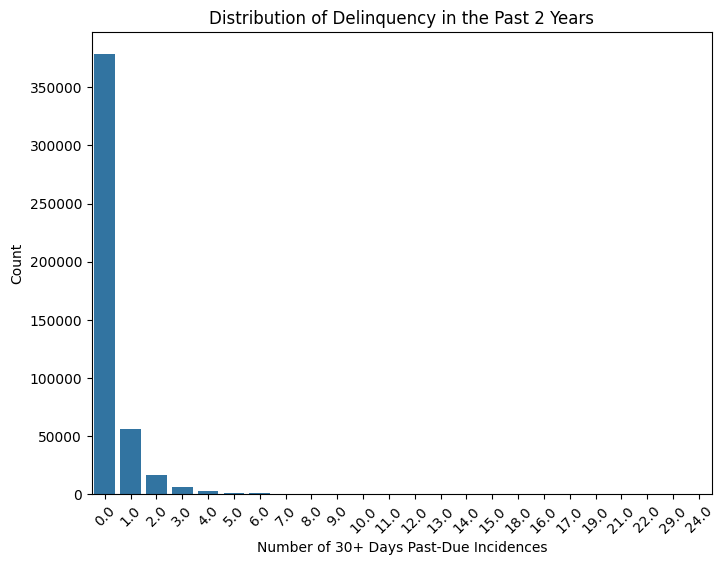

In [63]:
#delinq2yrs
plt.figure(figsize=(8, 6))
sns.countplot(data=df_2, x='delinq_2yrs', order=df['delinq_2yrs'].value_counts().index)
plt.title('Distribution of Delinquency in the Past 2 Years')
plt.xlabel('Number of 30+ Days Past-Due Incidences')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

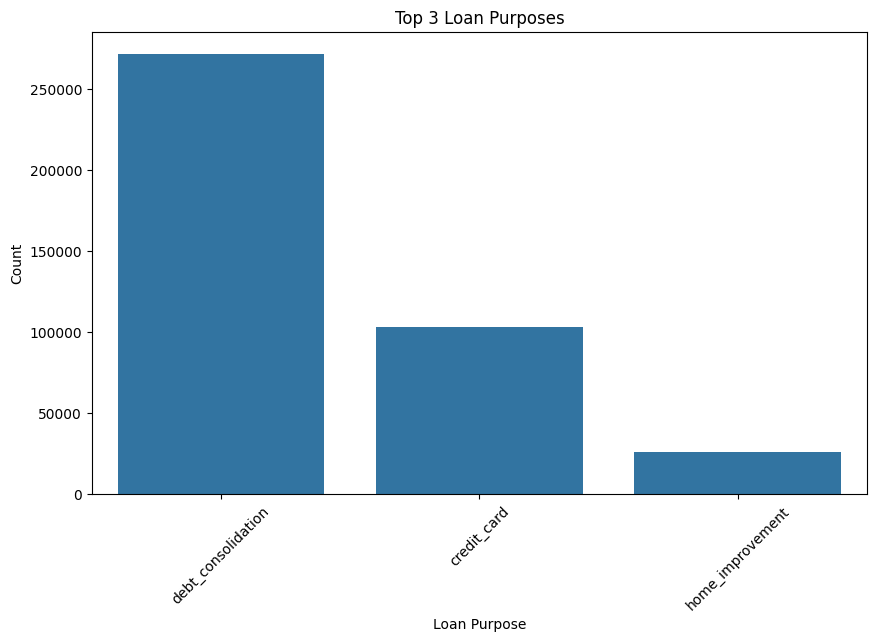

In [67]:
#top 3 purposes
top_purposes = df_2['purpose'].value_counts().nlargest(3).index
filtered_df_2 = df_2[df_2['purpose'].isin(top_purposes)]

# Plot distribution of top 3 loan purposes
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df_2, x='purpose', order=top_purposes)
plt.title('Top 3 Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_25376\1277609037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grade', data=df_2, palette='viridis', order=sorted(df_2['grade'].unique()))


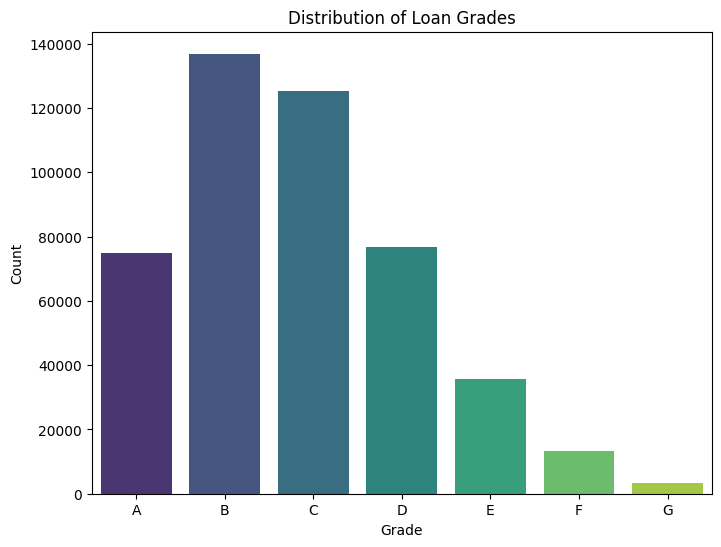

In [68]:
# loan grades
plt.figure(figsize=(8, 6))
sns.countplot(x='grade', data=df_2, palette='viridis', order=sorted(df_2['grade'].unique()))
plt.title('Distribution of Loan Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

In [70]:
print(categorical_col)

['grade', 'home_ownership', 'verification_status', 'loan_status', 'desc', 'purpose', 'initial_list_status']


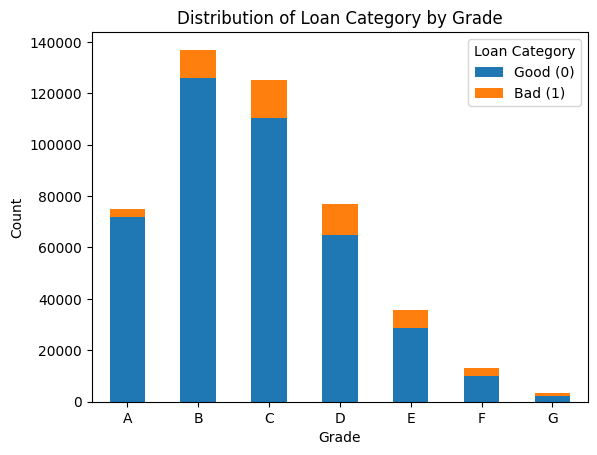

In [75]:
grade_loan_category_counts = df_2.groupby(['grade', 'loan_category']).size().unstack(fill_value=0)

# Bar chart
grade_loan_category_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Loan Category by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Loan Category', labels=['Good (0)', 'Bad (1)'])
plt.show()

Data Preprocessing

In [87]:
#fixing incorrect data type

#term
term_dtype = df_2['term'].dtype
print("Data type of 'term' column:", term_dtype)

# Convert term to integer
df_2['term'] = df_2['term'].str.extract('(\d+)').astype(int)

# Check the data type of term
print("Data type of 'term' column after conversion:", df_2['term'].dtype)


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp\AppData\Local\Temp\ipykernel_25376\1945807475.py:8: SyntaxWarning: invalid escape sequence '\d'
  df_2['term'] = df_2['term'].str.extract('(\d+)').astype(int)


Data type of 'term' column: object
Data type of 'term' column after conversion: int32


In [88]:
# emp_length
emp_length_dtype = df_2['emp_length'].dtype
print("Data type of 'emp_length' column:", emp_length_dtype)

# Convert emp_length to integer
df_2['emp_length'] = df_2['emp_length'].replace({'< 1 year': '0 years', '10+ years': '10 years'})
df_2['emp_length'] = df_2['emp_length'].str.extract('(\d+)').astype(float)

# Check the data type of emp_length
print("Data type of 'emp_length' column after conversion:", df_2['emp_length'].dtype)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp\AppData\Local\Temp\ipykernel_25376\852762494.py:7: SyntaxWarning: invalid escape sequence '\d'
  df_2['emp_length'] = df_2['emp_length'].str.extract('(\d+)').astype(float)


Data type of 'emp_length' column: object
Data type of 'emp_length' column after conversion: float64


In [89]:
df_2['home_ownership'] = df_2['home_ownership'].replace(['OTHER', 'ANY', 'NONE'], 'OTHER')

In [90]:
#missing values
missing_values_2 = (df_2.isnull().sum()/len(df_2)*100).round(2).sort_values(ascending=False)
missing_values_df_2 = pd.DataFrame(missing_values_2, columns=['Missing Values Percentage'])
missing_values_df_2

,Missing Values Percentage
mths_since_last_record,86.65
desc,72.99
emp_length,4.52
open_acc,1.05
acc_now_delinq,1.05
total_acc,1.05
pub_rec,1.05
delinq_2yrs,1.05
initial_list_status,1.04
dti,1.04


In [91]:
df_3 = df_2.drop(columns=['mths_since_last_record','desc'])

In [97]:
# split numerical and categorical
categorical_col_1 = []
numerical_col_1 = []

for i in df_3.columns:
  if new_df[i].dtype == 'object':
    categorical_col_1.append(i)
  else:
    numerical_col_1.append(i)

print('Categorical Columns')
print(categorical_col_1)
print('Numerical Columns')
print(numerical_col_1)

Categorical Columns
['grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status']
Numerical Columns
['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'total_acc', 'acc_now_delinq', 'loan_category']


In [95]:
# fill missing values
# categorical
df_3['home_ownership'].fillna(df_3['home_ownership'].mode()[0], inplace=True)
df_3['verification_status'].fillna(df_3['verification_status'].mode()[0], inplace=True)
df_3['loan_status'].fillna(df_3['loan_status'].mode()[0], inplace=True)
df_3['purpose'].fillna(df_3['purpose'].mode()[0], inplace=True)
df_3['initial_list_status'].fillna(df_3['initial_list_status'].mode()[0], inplace=True)

# numerical
df_3['emp_length'].fillna(df_3['emp_length'].median(), inplace=True)
df_3['open_acc'].fillna(df_3['open_acc'].median(), inplace=True)
df_3['acc_now_delinq'].fillna(df_3['acc_now_delinq'].median(), inplace=True)
df_3['total_acc'].fillna(df_3['total_acc'].median(), inplace=True)
df_3['pub_rec'].fillna(df_3['pub_rec'].median(), inplace=True)
df_3['delinq_2yrs'].fillna(df_3['delinq_2yrs'].median(), inplace=True)
df_3['dti'].fillna(df_3['dti'].median(), inplace=True)
df_3['annual_inc'].fillna(df_3['annual_inc'].median(), inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_25376\2569166340.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_3['emp_length'].fillna(df_3['emp_length'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_25376\2569166340.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [96]:
#missing values
missing_values_3 = (df_3.isnull().sum()/len(df_3)*100).round(2).sort_values(ascending=False)
missing_values_df_3 = pd.DataFrame(missing_values_3, columns=['Missing Values Percentage'])
missing_values_df_3

,Missing Values Percentage
loan_amnt,0.0
purpose,0.0
acc_now_delinq,0.0
initial_list_status,0.0
total_acc,0.0
pub_rec,0.0
open_acc,0.0
delinq_2yrs,0.0
dti,0.0
loan_status,0.0


In [ ]:
# feature selection

In [98]:
df_3[numerical_col_1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       466285 non-null  int64  
 1   funded_amnt     466285 non-null  int64  
 2   term            466285 non-null  int32  
 3   int_rate        466285 non-null  float64
 4   emp_length      466285 non-null  float64
 5   annual_inc      466285 non-null  float64
 6   dti             466285 non-null  float64
 7   delinq_2yrs     466285 non-null  float64
 8   open_acc        466285 non-null  float64
 9   pub_rec         466285 non-null  float64
 10  total_acc       466285 non-null  float64
 11  acc_now_delinq  466285 non-null  float64
 12  loan_category   466285 non-null  int64  
dtypes: float64(9), int32(1), int64(3)
memory usage: 44.5 MB


In [114]:
df_4 = df_3.drop(columns=['loan_status'])

In [115]:
cat = ['grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status']

In [116]:
num = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'total_acc', 'acc_now_delinq', 'loan_category']

In [117]:
# feature encoding
df_encoded = df_4.copy()
df_encoded[cat].describe().transpose()

,count,unique,top,freq
grade,466285,7,B,136929
home_ownership,466285,4,MORTGAGE,235906
verification_status,466285,3,Verified,168091
purpose,466285,14,debt_consolidation,276466
initial_list_status,466285,2,f,303409


In [107]:
# label encoding

In [118]:
from sklearn.preprocessing import LabelEncoder

# 1. Grade - Label Encoding
grade_encoder = LabelEncoder()
df_encoded['grade'] = grade_encoder.fit_transform(df_encoded['grade'])
df_encoded.head(5)


,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,total_acc,initial_list_status,acc_now_delinq,loan_category
0,5000,5000,36,10.65,1,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,3.0,0.0,9.0,f,0.0,0
1,2500,2500,60,15.27,2,0.0,RENT,30000.0,Source Verified,car,1.00,0.0,3.0,0.0,4.0,f,0.0,1
2,2400,2400,36,15.96,2,10.0,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,0.0,10.0,f,0.0,0
3,10000,10000,36,13.49,2,10.0,RENT,49200.0,Source Verified,other,20.00,0.0,10.0,0.0,37.0,f,0.0,0
4,3000,3000,60,12.69,1,1.0,RENT,80000.0,Source Verified,other,17.94,0.0,15.0,0.0,38.0,f,0.0,0


In [119]:
# 2. Verification Status - Label Encoding
verification_status_encoder = LabelEncoder()
df_encoded['verification_status'] = verification_status_encoder.fit_transform(df_encoded['verification_status'])
df_encoded.head(5)

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,total_acc,initial_list_status,acc_now_delinq,loan_category
0,5000,5000,36,10.65,1,10.0,RENT,24000.0,2,credit_card,27.65,0.0,3.0,0.0,9.0,f,0.0,0
1,2500,2500,60,15.27,2,0.0,RENT,30000.0,1,car,1.00,0.0,3.0,0.0,4.0,f,0.0,1
2,2400,2400,36,15.96,2,10.0,RENT,12252.0,0,small_business,8.72,0.0,2.0,0.0,10.0,f,0.0,0
3,10000,10000,36,13.49,2,10.0,RENT,49200.0,1,other,20.00,0.0,10.0,0.0,37.0,f,0.0,0
4,3000,3000,60,12.69,1,1.0,RENT,80000.0,1,other,17.94,0.0,15.0,0.0,38.0,f,0.0,0


In [120]:
# 3. Initial List Status - Label Encoding
initial_list_status_encoder = LabelEncoder()
df_encoded['initial_list_status'] = initial_list_status_encoder.fit_transform(df_encoded['initial_list_status'])
df_encoded.head(5)

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,total_acc,initial_list_status,acc_now_delinq,loan_category
0,5000,5000,36,10.65,1,10.0,RENT,24000.0,2,credit_card,27.65,0.0,3.0,0.0,9.0,0,0.0,0
1,2500,2500,60,15.27,2,0.0,RENT,30000.0,1,car,1.00,0.0,3.0,0.0,4.0,0,0.0,1
2,2400,2400,36,15.96,2,10.0,RENT,12252.0,0,small_business,8.72,0.0,2.0,0.0,10.0,0,0.0,0
3,10000,10000,36,13.49,2,10.0,RENT,49200.0,1,other,20.00,0.0,10.0,0.0,37.0,0,0.0,0
4,3000,3000,60,12.69,1,1.0,RENT,80000.0,1,other,17.94,0.0,15.0,0.0,38.0,0,0.0,0


In [121]:
# 4. home_ownership, purpose - one hot encoding
ohe_columns = ['home_ownership', 'purpose']

df_encoded_2 = pd.get_dummies(df_encoded, columns=ohe_columns, drop_first=True)

# Display the updated DataFrame
df_encoded_2.head(10)

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000,5000,36,10.65,1,10.0,24000.0,2,27.65,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2500,2500,60,15.27,2,0.0,30000.0,1,1.00,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2400,2400,36,15.96,2,10.0,12252.0,0,8.72,0.0,...,False,False,False,False,False,False,False,True,False,False
3,10000,10000,36,13.49,2,10.0,49200.0,1,20.00,0.0,...,False,False,False,False,False,True,False,False,False,False
4,3000,3000,60,12.69,1,1.0,80000.0,1,17.94,0.0,...,False,False,False,False,False,True,False,False,False,False
5,5000,5000,36,7.90,0,3.0,36000.0,1,11.20,0.0,...,False,False,False,False,False,False,False,False,False,True
6,7000,7000,60,15.96,2,8.0,47004.0,0,23.51,0.0,...,False,False,False,False,False,False,False,False,False,False
7,3000,3000,36,18.64,4,9.0,48000.0,1,5.35,0.0,...,False,False,False,False,False,False,False,False,False,False
8,5600,5600,60,21.28,5,4.0,40000.0,1,5.55,0.0,...,False,False,False,False,False,False,False,True,False,False
9,5375,5375,60,12.69,1,0.0,15000.0,2,18.08,0.0,...,False,False,False,False,False,True,False,False,False,False


In [122]:
# split features and target
X = df_encoded_2.drop(columns=['loan_category'])  # Features
y = df_encoded_2['loan_category']  # Target variable

In [123]:
# split train and test
from sklearn.model_selection import train_test_split

# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [124]:
# loan category for train data

a = pd.Series(y_train).value_counts().reset_index()
a.columns=['loan_category','total']
a['%'] = round(a['total']*100/sum(a['total']),3)
a

,loan_category,total,%
0,0,289929,88.827
1,1,36470,11.173


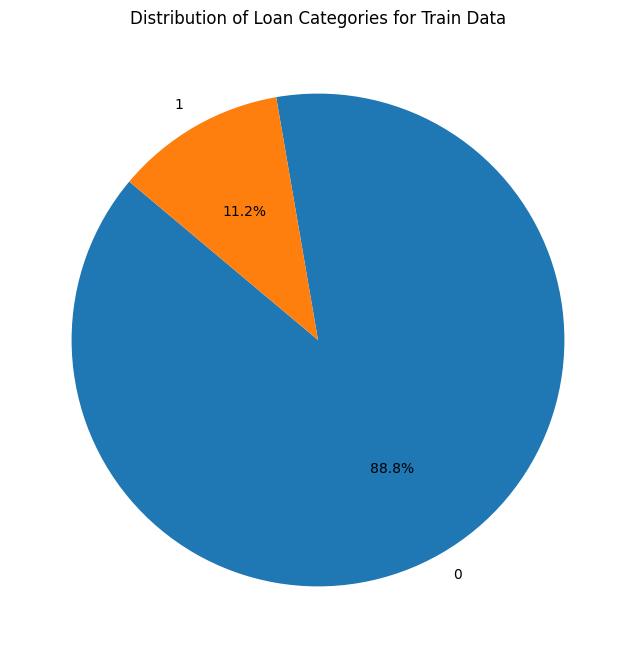

In [125]:
# loan category for train data
value_counts = pd.Series(y_train).value_counts()

# pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Categories for Train Data')
plt.show()

In [126]:
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

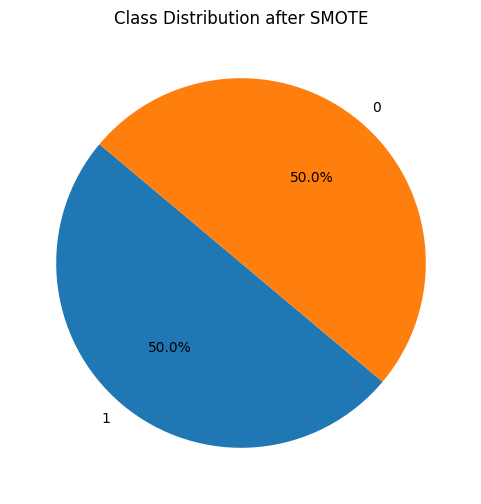

In [127]:
plt.figure(figsize=(6, 6))
plt.pie(y_resampled.value_counts(), labels=y_resampled.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution after SMOTE')
plt.show()

Data Modelling

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model on the resampled training data
logreg.fit(X_resampled, y_resampled)

# Predict on the train data
y_train_pred = logreg.predict(X_resampled)

# Evaluate performance on the train data
train_accuracy = accuracy_score(y_resampled, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Predict on the test data
y_test_pred = logreg.predict(X_test)

# Evaluate performance on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.6197844989635394
Test Accuracy: 0.5827245042391662


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the model on the resampled training data
dt_classifier.fit(X_resampled, y_resampled)

# Predict on the train data
y_train_pred_dt = dt_classifier.predict(X_resampled)

# Evaluate performance on the train data
train_accuracy_dt = accuracy_score(y_resampled, y_train_pred_dt)
print("Decision Tree Train Accuracy:", train_accuracy_dt)

# Predict on the test data
y_test_pred_dt = dt_classifier.predict(X_test)

# Evaluate performance on the test data
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print("Decision Tree Test Accuracy:", test_accuracy_dt)


Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.787662811146219
